In [1]:
# here is the all imports required 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Read CSV
emp_income = pd.read_csv(r'employment_income.csv')

In [3]:
# Rename column, replace space with "_"
emp_income = emp_income.rename({'Educational qualification':'Educational_qualification'},axis=1)
emp_income = emp_income.rename({'Field of study':'Field_of_study','Age group':'Age_group'},axis=1)
emp_income = emp_income.rename({'Status of student in Canada':'Status_of_student_in_Canada'},axis=1)
emp_income = emp_income.rename({'Characteristics after graduation':'Characteristics_after_graduation'},axis=1)
emp_income = emp_income.rename({'Graduate statistics':'Graduate_statistics'},axis=1)

### clean data

In [4]:
# convert objecy type to category type
emp_income = emp_income.astype('category')
emp_income['VALUE'] = emp_income['VALUE'].astype('float64')

In [5]:
# drop rows
# remove rows, which value of the column STATUS is equal to '..',(not available for a specific reference period) 
# remove rows, which value of the column STATUS is equal to x', (suppressed to meet the confidentiality requirements of the Statistics Act)
# 29834 rows removed
emp_income.drop(emp_income[emp_income.STATUS=='..'].index, inplace=True)
emp_income.drop(emp_income[emp_income.STATUS=='x'].index, inplace=True)
# only "Canadian students"
emp_income.drop(emp_income[emp_income.Status_of_student_in_Canada =='Canadian and international students'].index, inplace=True)
# remove "Total, educational qualification"
emp_income.drop(emp_income[emp_income.Educational_qualification == 'Total, educational qualification'].index, inplace=True)

In [6]:
# drop colums 
emp_income.drop(['UOM','DGUID','UOM_ID','SCALAR_FACTOR','SCALAR_ID','VECTOR','COORDINATE','STATUS','SYMBOL','TERMINATED','DECIMALS'],axis=1,inplace=True)
emp_income.drop(['Status_of_student_in_Canada'],axis=1,inplace=True)
emp_income.head()

,REF_DATE,GEO,Educational_qualification,Field_of_study,Gender,Age_group,Characteristics_after_graduation,Graduate_statistics,VALUE
5266,2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,All graduates,Number of graduates,13030.0
5267,2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates with no income information,Number of graduates,1705.0
5268,2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Full-time students,Number of graduates,630.0
5269,2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates reporting employment income,Number of graduates,10685.0
5270,2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates reporting employment income,Median employment income,35200.0


In [7]:
emp_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760522 entries, 5266 to 2189305
Data columns (total 9 columns):
REF_DATE                            760522 non-null category
GEO                                 760522 non-null category
Educational_qualification           760522 non-null category
Field_of_study                      760522 non-null category
Gender                              760522 non-null category
Age_group                           760522 non-null category
Characteristics_after_graduation    760522 non-null category
Graduate_statistics                 760522 non-null category
VALUE                               760522 non-null float64
dtypes: category(8), float64(1)
memory usage: 17.4 MB


### output CSV file by year
### create data frame by year

In [8]:
print(emp_income['REF_DATE'].unique())

[2010, 2011, 2012, 2013, 2014, 2015]
Categories (6, int64): [2010, 2011, 2012, 2013, 2014, 2015]


In [9]:
# output CSV file by year
# emp_income['REF_DATE'].unique() outputs [2010, 2011, 2012, 2013, 2014, 2015]
#
for year in emp_income['REF_DATE'].unique():
    print('employment_income_'+str(year)+'.csv')
    emp_income[emp_income.REF_DATE == year].to_csv('employment_income_'+ str(year) + '.csv',index=False)


employment_income_2010.csv
employment_income_2011.csv
employment_income_2012.csv
employment_income_2013.csv
employment_income_2014.csv
employment_income_2015.csv


In [10]:
emp_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760522 entries, 5266 to 2189305
Data columns (total 9 columns):
REF_DATE                            760522 non-null category
GEO                                 760522 non-null category
Educational_qualification           760522 non-null category
Field_of_study                      760522 non-null category
Gender                              760522 non-null category
Age_group                           760522 non-null category
Characteristics_after_graduation    760522 non-null category
Graduate_statistics                 760522 non-null category
VALUE                               760522 non-null float64
dtypes: category(8), float64(1)
memory usage: 17.4 MB


### work with emp_income

In [11]:
emp_income['REF_DATE'] = emp_income['REF_DATE'].apply(lambda x: 'year'+str(x))

In [12]:
emp_income

,REF_DATE,GEO,Educational_qualification,Field_of_study,Gender,Age_group,Characteristics_after_graduation,Graduate_statistics,VALUE
5266,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,All graduates,Number of graduates,13030.0
5267,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates with no income information,Number of graduates,1705.0
5268,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Full-time students,Number of graduates,630.0
5269,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates reporting employment income,Number of graduates,10685.0
5270,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates reporting employment income,Median employment income,35200.0
...,...,...,...,...,...,...,...,...,...
2189293,year2015,Territories,Master's degree,Public administration and social service profe...,Female gender,15 to 64 years,Graduates reporting employment income,Number of graduates,0.0
2189295,year2015,Territories,Master's degree,Public administration and social service profe...,Female gender,15 to 64 years,"Graduates reporting wages, salaries and commis...",Number of graduates,0.0
2189302,year2015,Territories,Master's degree,Public administration and social service profe...,Female gender,35 to 64 years,All graduates,Number of graduates,5.0
2189303,year2015,Territories,Master's degree,Public administration and social service profe...,Female gender,35 to 64 years,Graduates reporting employment income,Number of graduates,0.0


In [13]:
#emp_income.reset_index(inplace=True)
# only the rows with column Characteristics_after_graduation has value of 'Graduates reporting employment income' or'Graduates reporting wages, salaries and commissions only' reported income
vGraduate_statistics = ['Graduates reporting employment income','Graduates reporting wages, salaries and commissions only']
emp_income_reportedIncome = emp_income.loc[emp_income['Characteristics_after_graduation'].isin(vGraduate_statistics)]
emp_income_reportedIncome

,REF_DATE,GEO,Educational_qualification,Field_of_study,Gender,Age_group,Characteristics_after_graduation,Graduate_statistics,VALUE
5269,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates reporting employment income,Number of graduates,10685.0
5270,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates reporting employment income,Median employment income,35200.0
5271,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,"Graduates reporting wages, salaries and commis...",Number of graduates,8600.0
5272,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,"Graduates reporting wages, salaries and commis...",Median employment income,36800.0
5283,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 34 years,Graduates reporting employment income,Number of graduates,5030.0
...,...,...,...,...,...,...,...,...,...
2189285,year2015,Territories,Master's degree,Public administration and social service profe...,"Total, gender",35 to 64 years,"Graduates reporting wages, salaries and commis...",Number of graduates,0.0
2189293,year2015,Territories,Master's degree,Public administration and social service profe...,Female gender,15 to 64 years,Graduates reporting employment income,Number of graduates,0.0
2189295,year2015,Territories,Master's degree,Public administration and social service profe...,Female gender,15 to 64 years,"Graduates reporting wages, salaries and commis...",Number of graduates,0.0
2189303,year2015,Territories,Master's degree,Public administration and social service profe...,Female gender,35 to 64 years,Graduates reporting employment income,Number of graduates,0.0


In [14]:
emp_income_reportedIncome['Graduate_statistics'].unique()

[Number of graduates, Median employment income]
Categories (2, object): [Number of graduates, Median employment income]

In [15]:
emp_income_reportedIncome['Characteristics_after_graduation'].unique()

[Graduates reporting employment income, Graduates reporting wages, salaries and commis...]
Categories (2, object): [Graduates reporting employment income, Graduates reporting wages, salaries and commis...]

In [16]:
emp_income_median = emp_income[emp_income.Graduate_statistics == 'Median employment income']
emp_income_median.head()
emp_income_median.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122581 entries, 5270 to 2187170
Data columns (total 9 columns):
REF_DATE                            122581 non-null category
GEO                                 122581 non-null category
Educational_qualification           122581 non-null category
Field_of_study                      122581 non-null category
Gender                              122581 non-null category
Age_group                           122581 non-null category
Characteristics_after_graduation    122581 non-null category
Graduate_statistics                 122581 non-null category
VALUE                               122581 non-null float64
dtypes: category(8), float64(1)
memory usage: 2.8 MB


In [17]:
emp_income_median['new_FieldOfStudy'] = emp_income_median[[ 'Field_of_study','Educational_qualification']].astype(str).apply('-'.join, axis=1)

C:\Users\wiwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
emp_income_median.drop(['Educational_qualification','Field_of_study','Characteristics_after_graduation','Graduate_statistics'],axis=1,inplace=True)

C:\Users\wiwang\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Does gender or age affect the median income in the same field of study?


In [19]:
# convert objecy type to category type
emp_income_median = emp_income_median.astype('object')
emp_income_median['VALUE'] = emp_income_median['VALUE'].astype('float64')
emp_income_median.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122581 entries, 5270 to 2187170
Data columns (total 6 columns):
REF_DATE            122581 non-null object
GEO                 122581 non-null object
Gender              122581 non-null object
Age_group           122581 non-null object
VALUE               122581 non-null float64
new_FieldOfStudy    122581 non-null object
dtypes: float64(1), object(5)
memory usage: 6.5+ MB


In [20]:
# pd.pivot_table
index_list = ['GEO','Age_group']
#p_median = pd.pivot_table(emp_income_median, values = 'VALUE', index=index_list, columns = 'REF_DATE').reset_index()
p_genderAge = pd.pivot_table(emp_income_median, values = 'VALUE', index=index_list, columns = 'Gender').reset_index()
p_genderAge


Gender,GEO,Age_group,Female gender,Male gender,"Total, gender"
0,Alberta,15 to 34 years,52680.476556,61381.885856,56727.350427
1,Alberta,15 to 64 years,56767.668671,65624.779412,60160.414334
2,Alberta,35 to 64 years,68614.396285,85151.083032,74416.809422
3,British Columbia,15 to 34 years,44342.895587,50850.396583,47633.719931
4,British Columbia,15 to 64 years,48013.723696,55679.076769,51679.366853
5,British Columbia,35 to 64 years,56045.522388,66686.682809,59695.256660
6,Canada,15 to 34 years,43310.384833,50362.515300,46456.328365
7,Canada,15 to 64 years,47332.985690,53435.219795,50407.024533
8,Canada,35 to 64 years,55545.882789,65791.144975,59084.818942
9,Manitoba,15 to 34 years,46209.685864,49391.573034,47797.408400


In [21]:
p_genderAge.fillna(np.round(p_genderAge.mean()),inplace=True)
p_gender = p_genderAge.groupby('GEO').mean()
p_gender

Gender,Female gender,Male gender,"Total, gender"
GEO,,,
Alberta,59354.180504,70719.249433,63768.191394
British Columbia,49467.380557,57738.718720,53002.781148
Canada,48729.751104,56529.626690,51982.723947
Manitoba,52040.485022,58065.469982,53128.167447
New Brunswick,43051.080666,52248.587910,44620.482436
Newfoundland and Labrador,52206.028560,61253.878551,53550.452182
Nova Scotia,48223.895945,52269.432225,48277.790699
Ontario,54192.594454,60400.892360,57068.399888
Prince Edward Island,43565.174624,45863.984083,46976.122309


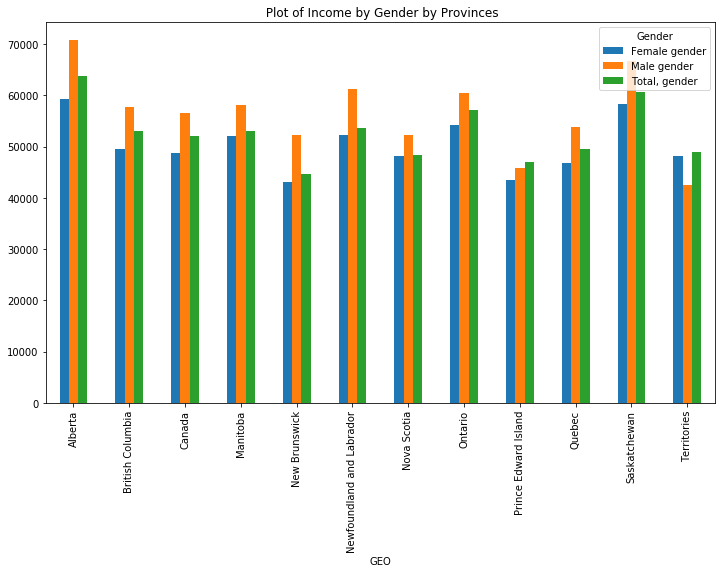

In [22]:

plt.rcParams["figure.figsize"] = (12,7)
p_gender.plot(y = ['Female gender','Male gender','Total, gender'], kind='bar')
plt.title( " Plot of Income by Gender by Provinces")
plt.show()

looking across all provinces except for one, female income is lower than male income by varying amounts. The exception is territoris. Alberta nad Saskatchewan have biggest varying amount between female and male.

Text(0.5, 1.0, ' Plot of Income by Gender')

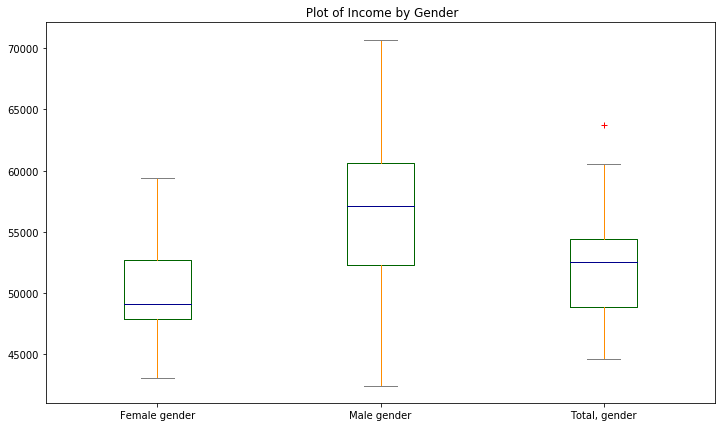

In [23]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
p_gender.plot.box(color=color, sym='r+')
plt.title( " Plot of Income by Gender")

The male 25% quantile is almost the same level of femail 75% quantile. The male income range is much bigger than female. 
Between male and female, mimimum income are around the same level, however male highest income is much higher than female.
The female income has much lower variance.

This is not accounting for field of study. 



In [24]:
p_genderAge

Gender,GEO,Age_group,Female gender,Male gender,"Total, gender"
0,Alberta,15 to 34 years,52680.476556,61381.885856,56727.350427
1,Alberta,15 to 64 years,56767.668671,65624.779412,60160.414334
2,Alberta,35 to 64 years,68614.396285,85151.083032,74416.809422
3,British Columbia,15 to 34 years,44342.895587,50850.396583,47633.719931
4,British Columbia,15 to 64 years,48013.723696,55679.076769,51679.366853
5,British Columbia,35 to 64 years,56045.522388,66686.682809,59695.256660
6,Canada,15 to 34 years,43310.384833,50362.515300,46456.328365
7,Canada,15 to 64 years,47332.985690,53435.219795,50407.024533
8,Canada,35 to 64 years,55545.882789,65791.144975,59084.818942
9,Manitoba,15 to 34 years,46209.685864,49391.573034,47797.408400


In [25]:
p_ageGroup = p_genderAge.groupby(['Age_group']).mean()
p_ageGroup

Gender,Female gender,Male gender,"Total, gender"
Age_group,,,
15 to 34 years,45468.871148,49061.694023,47672.988780
15 to 64 years,48569.322843,52356.475515,50567.275716
35 to 64 years,57015.278192,68118.898461,59614.467166


In [26]:
p_ageGroup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 15 to 34 years to 35 to 64 years
Data columns (total 3 columns):
Female gender    3 non-null float64
Male gender      3 non-null float64
Total, gender    3 non-null float64
dtypes: float64(3)
memory usage: 96.0+ bytes


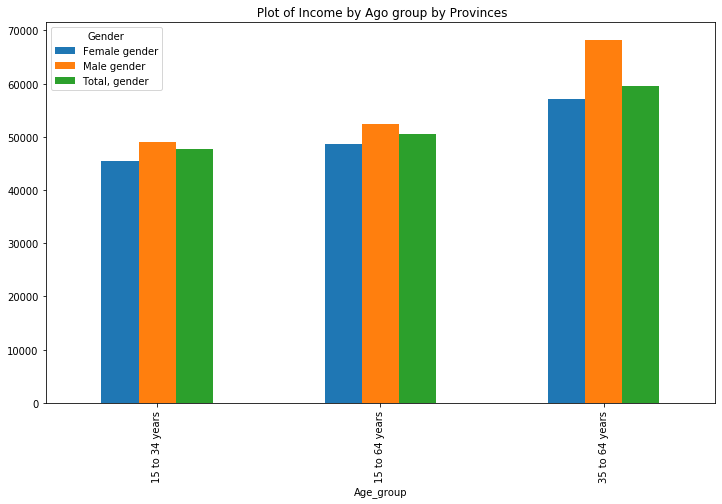

In [27]:
plt.rcParams["figure.figsize"] = (12,7)
p_ageGroup.plot(y = ['Female gender','Male gender','Total, gender'], kind='bar')
plt.title( " Plot of Income by Ago group by Provinces")
plt.show()

looking across all age group, female income is lower than male income by varying amounts. In the 35 to 64  years age group, female and male income has biggest various.

Text(0.5, 1.0, ' Plot of Income by Ago group')

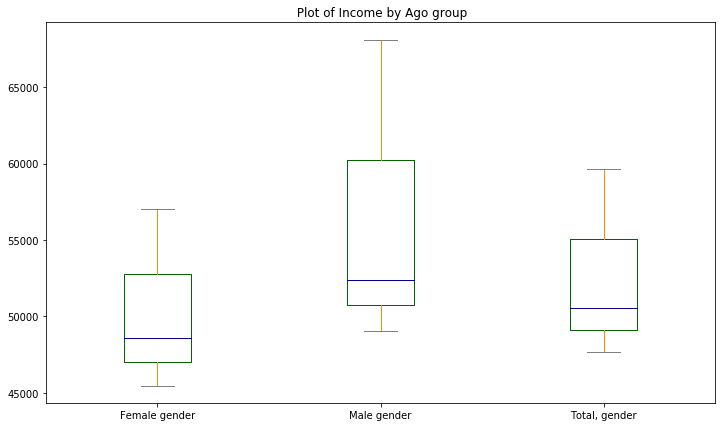

In [28]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}

p_ageGroup.plot.box(color=color, sym='r+')
plt.title( " Plot of Income by Ago group")

By age group, the male 75% quantile is much higher than female 75% quantile, even higher than maximum female income. The male income range is much bigger than female.The female income has much lower variance.

## Conclusion:

Considering from 2010 to 2015, 
Between male and female, female income is lower than male in all provinces except territoris. The male income range is much bigger than female. Female and male mimimum income are around the same level for all provinces.

by age group, female income is significantly lower than male at all levels..
